In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('stock.csv',index_col="Date",parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237732,4718327
2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086243,3248957
2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182770,3374427
2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812
2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178925,4387036
...,...,...,...,...,...,...
2021-10-25,2680.000000,2680.000000,2570.000000,2601.800049,2601.800049,7937067
2021-10-26,2617.100098,2668.899902,2603.149902,2661.050049,2661.050049,4499706
2021-10-27,2652.000000,2676.800049,2619.949951,2627.399902,2627.399902,4567140


In [3]:
df.index=pd.to_datetime(df.index)

In [4]:
df['30dma']=df['Open'].rolling(30).mean()

In [5]:
df['30days_ewm']=df['Open'].ewm(span=30).mean()

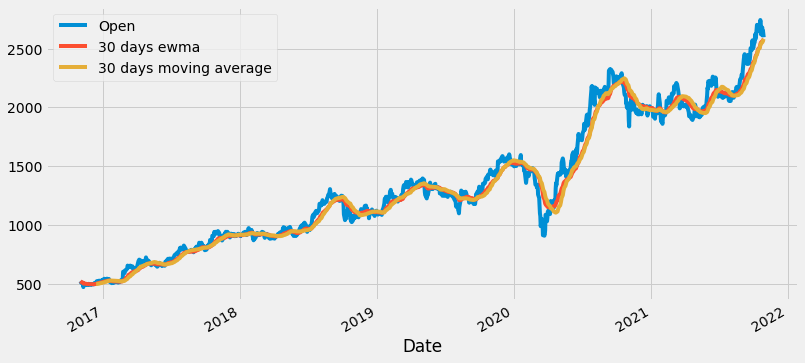

In [9]:
plt.figure(figsize=(12,6))
df['Open'].plot(label="Open")
df['30days_ewm'].plot(label="30 days ewma")
df['30dma'].plot(label="30 days moving average")
plt.legend()

In [7]:
from sklearn.metrics import mean_squared_error
mse_ewma=mean_squared_error(df['Open'],df['30days_ewm'])
mse_ewma

6223.0871287987

In [8]:
mse_dma=mean_squared_error(df['Open'],df['30dma'].fillna(0))
mse_dma

14175.379501926618